In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def grad_f(x):
    return (4 * math.sin(x) - 6 * (math.sin(x) ** 3))
def f(x):
    return math.sin(x) * math.sin(2*x)

In [41]:
#первый шаг градиентного спуска
alpha = 1/5
#константа остановки алгоритма
eps = 1e-4
x_min = - 3 * math.pi / 2 - math.asin(math.sqrt(2/3))
x_max = 3 * math.pi / 2 + math.asin(math.sqrt(2/3))
x0_list = np.linspace(x_min, x_max, 100)

Секрет быстрой сходимости алгоритма, взять не очень большой размер первого шага алгоритма и далее делить размер шага на номер шага алгоритма. Можно еще посмотреть на скорость сходимости в точках и мы увидим, что время различается, на некоторых точках алгоритм сходится заметно медленнее.

In [42]:
#построим градиентный спуска для всех вохможных начальных x
full_result = []
for x0 in tqdm(x0_list):
    i = 1
    result = {}
    result = {"x": [], "grad_f":[], "f":[]}
    while abs(grad_f(x0)) > eps:
        x0 = x0 - alpha/i * grad_f(x0)
        result['grad_f'].append(grad_f(x0))
        result["x"].append(x0)
        result["f"].append(f(x0))
        i += 1
    full_result.append(result)

100%|██████████| 100/100 [03:58<00:00,  2.38s/it]


Построим график зависимости найденного оптимального решения от начального x и зависимость значения функции в оптимальном x от начального значения.

Text(0, 0.5, 'f_optimal')

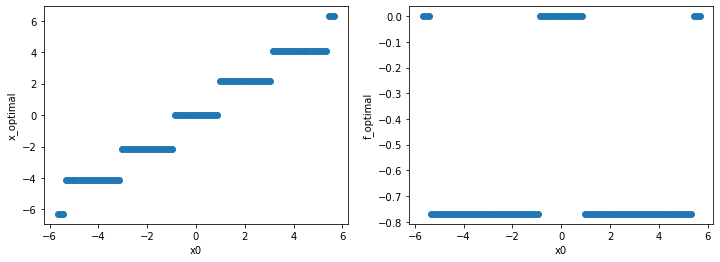

In [43]:
x_optimal = [result["x"][-1] for result in full_result]
f_min = [f(x) for x in x_optimal]
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].scatter(x0_list, x_optimal)
ax[0].set_xlabel("x0")
ax[0].set_ylabel("x_optimal")
ax[1].scatter(x0_list, f_min)
ax[1].set_xlabel("x0")
ax[1].set_ylabel("f_optimal")

In [63]:
round_f_min = np.array(list(map(round, f_min)))
_, count = np.unique(round_f_min, return_counts=True)
count[1]/count[0]

0.28205128205128205

Заметим, что алгоритм скатывается в локальные минимумы, соответствующие разным оптимальным значениям x. Оптимальное значение x зависит от стартового и является ближайшим к нему x.

__Вблизи каких точек будет останавливаться алгоритм?__

Вблизи значений функции -0.77 и 0

__Какая доля спусков сойдется к каждой из точек останова, если точек для запуска спуска было выбрано достаточно много?__

По графику видим, что примерно 3/10 точек сойдутся к значениям функции, соответствующим -0.77 и остальные к 0 (при взятии 1000 начальных точек).